In [11]:
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [12]:
#FROM NOTES: energy source generation:annual generation of energy by state (eia.gov)
# SOURCE: https://www.eia.gov/electricity/data/state/

eiafile = os.path.join('Resources', 'eia.xls')
eai_df = pd.read_excel(eiafile, encoding='UTF-8')
# eai_df.head(10)

In [13]:
emissions_file = os.path.join('Resources', 'targetyears_emissiondata.xlsx')
target_em_df = pd.read_excel(emissions_file, sheet_name='Sheet1', encoding='UTF-8')
target_em_df.head()

,Year,State abbreviation,State annual NOx emissions (tons),State annual SO2 emissions (tons),State annual CO2 emissions (tons),State annual CH4 emissions (lbs),State annual N2O emissions (lbs)
0,2000,AK,14978.584,4151.465,3.975039e+06,NaN,NaN
1,2000,AL,189508.640,515083.663,8.993231e+07,NaN,NaN
2,2000,AR,53543.838,76510.438,3.208581e+07,NaN,NaN
3,2000,AZ,104220.977,72401.525,5.227386e+07,NaN,NaN
4,2000,CA,58741.984,17917.106,6.595547e+07,NaN,NaN


In [14]:
target_em_df = target_em_df[["Year", "State abbreviation", "State annual CO2 emissions (tons)"]]
target_em_df.head()

,Year,State abbreviation,State annual CO2 emissions (tons)
0,2000,AK,3.975039e+06
1,2000,AL,8.993231e+07
2,2000,AR,3.208581e+07
3,2000,AZ,5.227386e+07
4,2000,CA,6.595547e+07


In [15]:
year_2000 = target_em_df.loc[target_em_df["Year"] ==2000,:]
year_2005 = target_em_df.loc[target_em_df["Year"] ==2005,:]
year_2010 = target_em_df.loc[target_em_df["Year"] ==2010,:]
year_2014 = target_em_df.loc[target_em_df["Year"] ==2014,:]

In [17]:
# FROM NOTES: health respiratory data: Mortality rate for respiratory diseases from 1980-2014 (globalhealthdataexchange)
# SOURCE: http://ghdx.healthdata.org/record/united-states-chronic-respiratory-disease-mortality-rates-county-1980-2014

healthfile = os.path.join('Resources', 'us_resp_mort.xlsx')
health_df = pd.read_excel(healthfile, sheet_name='Summary', encoding='UTF-8')
health_df.head()

,State,Mortality Rate 2000,Mortality Rate 2005,Mortality Rate 2010,Mortality Rate 2014
0,Alabama,65.65,69.21,70.86,73.44
1,Alaska,60.23,56.90,52.77,51.36
2,Arizona,58.24,56.44,51.18,51.93
3,Arkansas,62.11,65.31,66.44,69.63
4,California,52.14,49.25,44.59,41.94


In [20]:
year_2000_mortality = health_df["Mortality Rate 2000"]
year_2005_mortality = health_df["Mortality Rate 2005"]
year_2010_mortality = health_df["Mortality Rate 2010"]
year_2014_mortality = health_df["Mortality Rate 2014"]

year_2000_emissions = year_2000["State annual CO2 emissions (tons)"]
year_2005_emissions = year_2005["State annual CO2 emissions (tons)"]
year_2010_emissions = year_2010["State annual CO2 emissions (tons)"]
year_2014_emissions = year_2014["State annual CO2 emissions (tons)"]

T_test_2000 = stats.ttest_ind(year_2000_mortality, year_2000_emissions, equal_var=False)
T_test_2005 = stats.ttest_ind(year_2005_mortality, year_2005_emissions, equal_var=False)
T_test_2010 = stats.ttest_ind(year_2010_mortality, year_2010_emissions, equal_var=False)
T_test_2014 = stats.ttest_ind(year_2014_mortality, year_2014_emissions, equal_var=False)

print(T_test_2000)
print(T_test_2005)
print(T_test_2010)
print(T_test_2014)

Ttest_indResult(statistic=-7.397806410084409, pvalue=1.4341865634631328e-09)
Ttest_indResult(statistic=-7.567834175107434, pvalue=7.791400777669312e-10)
Ttest_indResult(statistic=-7.377385595921671, pvalue=1.5433550964637117e-09)
Ttest_indResult(statistic=-7.084355093680925, pvalue=4.428637230619531e-09)


Text(0,0.5,'Mortality Rate')

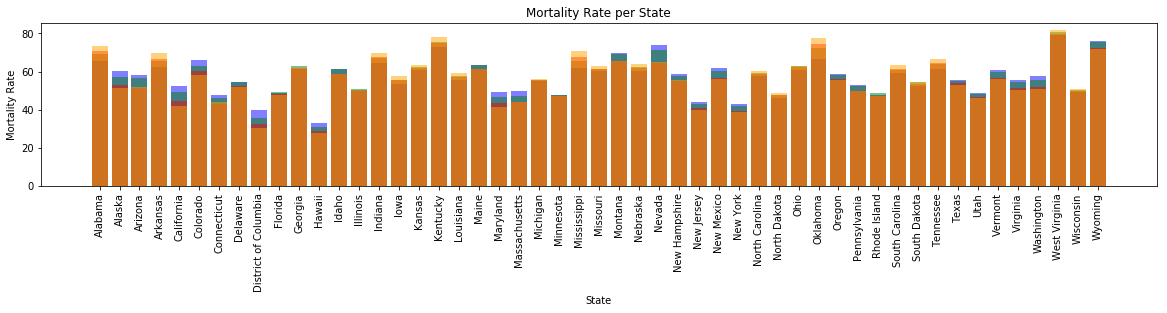

In [23]:
x_axis = np.arange(len(health_df))
tick_locations = [value+0.4 for value in x_axis]

plt.figure(figsize=(20,3))
plt.bar(x_axis, health_df["Mortality Rate 2000"], color="blue", alpha=0.5, align="edge")
plt.bar(x_axis, health_df["Mortality Rate 2005"], color="green", alpha=0.5, align="edge")
plt.bar(x_axis, health_df["Mortality Rate 2010"], color="red", alpha=0.5, align="edge")
plt.bar(x_axis, health_df["Mortality Rate 2014"], color="orange", alpha=0.5, align="edge")
plt.xticks(tick_locations, health_df["State"], rotation="vertical")

plt.title("Mortality Rate per State")
plt.xlabel("State")
plt.ylabel("Mortality Rate")

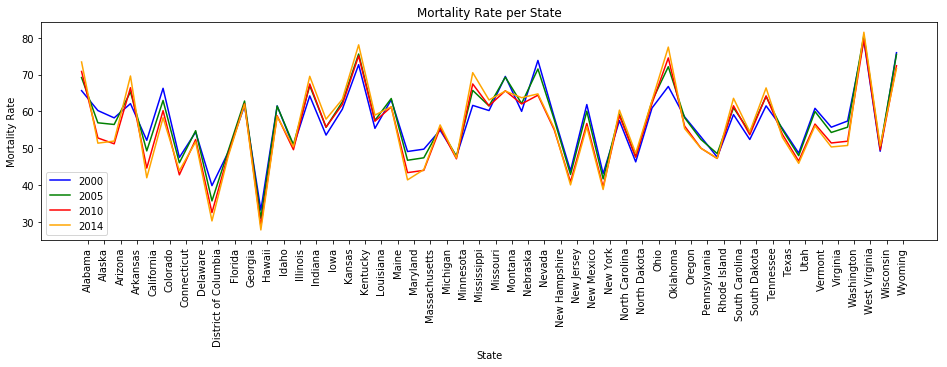

In [24]:
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, health_df["State"], rotation="vertical")
year1 = plt.plot(health_df["State"], health_df["Mortality Rate 2000"], color="blue", label="2000")
year2 = plt.plot(health_df["State"], health_df["Mortality Rate 2005"], color="green", label="2005")
year3 = plt.plot(health_df["State"], health_df["Mortality Rate 2010"], color="red", label="2010")
year4 = plt.plot(health_df["State"], health_df["Mortality Rate 2014"], color="orange", label="2014")
# plt.figure(figsize=(100,10))
plt.subplots_adjust(right=2.2)

plt.title("Mortality Rate per State")
plt.xlabel("State")
plt.ylabel("Mortality Rate")
plt.legend(loc="best")

plt.show()

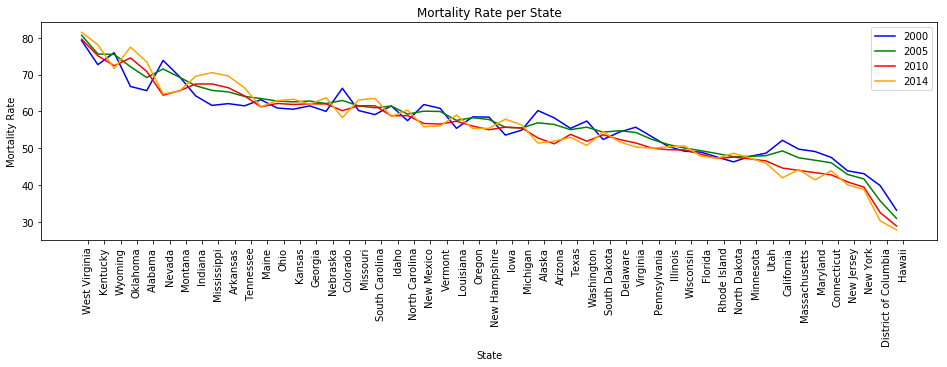

In [25]:
health_df["Average"] = (health_df["Mortality Rate 2000"]+
                       health_df["Mortality Rate 2005"]+
                       health_df["Mortality Rate 2010"]+
                       health_df["Mortality Rate 2014"])/4
sorted_df = health_df.sort_values(by=['Average'], ascending=False)

tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, sorted_df["State"], rotation="vertical")
year1 = plt.plot(sorted_df["State"], sorted_df["Mortality Rate 2000"], color="blue", label="2000")
year2 = plt.plot(sorted_df["State"], sorted_df["Mortality Rate 2005"], color="green", label="2005")
year3 = plt.plot(sorted_df["State"], sorted_df["Mortality Rate 2010"], color="red", label="2010")
year4 = plt.plot(sorted_df["State"], sorted_df["Mortality Rate 2014"], color="orange", label="2014")
# plt.figure(figsize=(100,10))
plt.subplots_adjust(right=2.2)

plt.title("Mortality Rate per State")
plt.xlabel("State")
plt.ylabel("Mortality Rate")
plt.legend(loc="best")

plt.show()

In [20]:
# FROM NOTES: labor/wages: income by year from 1984-2017 (census.gov)
# SOURCE: https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-income-households.html
#     Table H-8. Median Household Income by State

incomefile = os.path.join('Resources', 'median_income_yearly.xlsx')
income_df = pd.read_excel(incomefile, encoding='UTF-8')
# income_df.head(15)

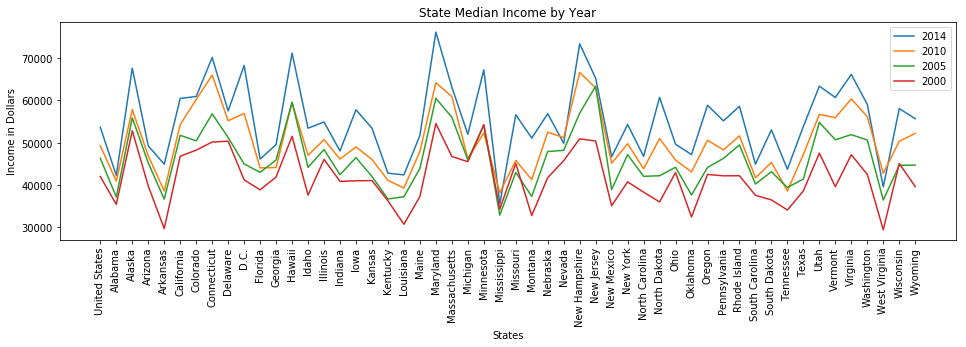

In [30]:
income_df_clean = income_df.dropna(how = 'any')
st8 = income_df_clean['State']
tick_location = np.arange(len(st8))
# tick_locations = [value for value in st8]

k2017 = income_df_clean['2017 Median Income']
k2016 = income_df_clean['2016 Median Income']
k2015 = income_df_clean['2015 Median Income']
k2014 = income_df_clean['2014 Median Income']
k2013 = income_df_clean['2013 Median Income']
k2012 = income_df_clean['2012 Median Income']
k2011 = income_df_clean['2011 Median Income']
k2010 = income_df_clean['2010 Median Income']
k2009 = income_df_clean['2009 Median Income']
k2008 = income_df_clean['2008 Median Income']
k2007 = income_df_clean['2007 Median Income']
k2006 = income_df_clean['2006 Median Income']
k2005 = income_df_clean['2005 Median Income']
k2004 = income_df_clean['2004 Median Income']
k2003 = income_df_clean['2003 Median Income']
k2002 = income_df_clean['2002 Median Income']
k2001 = income_df_clean['2001 Median Income ']
k2000 = income_df_clean['2000 Median Income']

# plt.plot(st8,k2017, label = '2017')
# plt.plot(st8,k2016, label = '2016')
# plt.plot(st8,k2015, label = '2015')
plt.plot(st8,k2014, label = '2014')
# plt.plot(st8,k2013, label = '2013')
# plt.plot(st8,k2012, label = '2012')
# plt.plot(st8,k2011, label = '2011')
plt.plot(st8,k2010, label = '2010')
# plt.plot(st8,k2009, label = '2009')
# plt.plot(st8,k2008, label = '2008')
# plt.plot(st8,k2007, label = '2007')
# plt.plot(st8,k2006, label = '2006')
plt.plot(st8,k2005, label = '2005')
# plt.plot(st8,k2004, label = '2004')
# plt.plot(st8,k2003, label = '2003')
# plt.plot(st8,k2002, label = '2002')
# plt.plot(st8,k2001, label = '2001')
plt.plot(st8,k2000, label = '2000')

plt.title('State Median Income by Year')
plt.xlabel('States')
plt.ylabel('Income in Dollars')
plt.legend(loc = 'best')
plt.subplots_adjust(right = 2.2)
tick_me = plt.xticks(tick_location, income_df_clean['State'], rotation = 'vertical') 


In [5]:
# FROM NOTES: emissions: emissions and generation resource integrated database (epa.gov)

# this file is for a summary of 2016 "State Output Emission rates
# SOURCE: https://www.epa.gov/energy/emissions-generation-resource-integrated-database-egrid

# emissionsfile = os.path.join('Project-1', 'Resources', 'eGrid2016.xlsx')
# emissions_df = pd.read_excel(emissionsfile, sheet_name='Table 3', encoding='UTF-8')
# emissions_df.head(15)



# OTHER NOTES: eGRID_All_Files_1996_thru_2016_data.zip contains all files from all editions of eGRID including operational data for the following years:
#   1996, 1997, 1998, 1999, 2000, 2004, 2005, 2007, 2009, 2010, 2012, 2014, and 2016.

In [31]:
#Energy generation stuff 
#isolate type of producer
scotts_total_power = eai_df[eai_df["TYPE OF PRODUCER"]=="Total Electric Power Industry"]
# scotts_total_power.head()

#group by the important stuff
scotts_total_power_df = scotts_total_power.groupby(["YEAR", "STATE", "ENERGY SOURCE"]).sum()
# scotts_total_power_df.head(10000)

#isolate type of energy source
Coal =scotts_total_power[scotts_total_power["ENERGY SOURCE"] =="Coal"] 
Petroleum =scotts_total_power[scotts_total_power["ENERGY SOURCE"] =="Petroleum"] 
Nuclear =scotts_total_power[scotts_total_power["ENERGY SOURCE"] =="Nuclear"]
Natural_gas =scotts_total_power[scotts_total_power["ENERGY SOURCE"] =="Natural Gas"] 
Hydroelectric =scotts_total_power[scotts_total_power["ENERGY SOURCE"] =="Hydroelectric Conventional"] 
Other_biomass =scotts_total_power[scotts_total_power["ENERGY SOURCE"] =="Other Biomass"] 
Other =scotts_total_power[scotts_total_power["ENERGY SOURCE"] =="Other"]
Total =scotts_total_power[scotts_total_power["ENERGY SOURCE"] =="Total"] 

#group the types of energy sources by state
Coal_group = Coal.groupby(["YEAR","STATE"])
Petroleum_group =Petroleum.groupby(["YEAR","STATE"])
Nuclear_group =Nuclear.groupby(["YEAR","STATE"])
Natural_gas_group =Natural_gas.groupby(["YEAR","STATE"])
Hydroelectric_group =Hydroelectric.groupby(["YEAR","STATE"])
Other_biomass_group =Other_biomass.groupby(["YEAR","STATE"])
Other_group =Other.groupby(["YEAR","STATE"])
Total_group =Total.groupby(["YEAR","STATE"])

#lets see what the cleaned data looks like
# Coal_group.head(15)

In [13]:
#######   Robby emission stuff   ##############
# Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#file location (this was for the first example I made - now I will try and put all of the others into a folder)
#file = "2016_example2.csv"

#file location, from folder with all 'clean' data
master = "Resources/master_final.csv"

#show file
df_original = pd.read_csv(master)
df_original.head()

#my_df = pd.DataFrame(df_original, index =['State abbreviation'], columns=['State annual NOx emissions (tons)', 'State annual SO2 emissions (tons)', 'State annual CO2 emissions (tons)', 'State annual CH4 emissions (lbs)', 'State annual N2O emissions (lbs)'])
my_df = pd.DataFrame(df_original)
my_df['State annual NOx emissions (tons)'].dtype

# after looking through errors, found a discrepancy in the core data
# print(my_df.loc[313])

# replace that discrepancy with a "0" value
my_df['State annual NOx emissions (tons)'][313]=0
print(my_df.loc[313])

Year                                      2005
State abbreviation                          DC
State annual NOx emissions (tons)            0
State annual SO2 emissions (tons)       914.34
State annual CO2 emissions (tons)    274,901.1
State annual CH4 emissions (lbs)      23,728.7
State annual N2O emissions (lbs)       4,745.7
Name: 313, dtype: object


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
#######   Robby emission stuff   ##############
#change data so that you remove commmas and dash marks
my_df['State abbreviation'] = my_df['State abbreviation'].str.replace('-', '0')
my_df['State annual NOx emissions (tons)'] = my_df['State annual NOx emissions (tons)'].str.replace(',', '')
my_df['State annual SO2 emissions (tons)'] = my_df['State annual SO2 emissions (tons)'].str.replace(',', '')
my_df['State annual CO2 emissions (tons)'] = my_df['State annual CO2 emissions (tons)'].str.replace(',', '')
my_df['State annual CH4 emissions (lbs)'] = my_df['State annual CH4 emissions (lbs)'].str.replace(',', '')
my_df['State annual N2O emissions (lbs)'] = my_df['State annual N2O emissions (lbs)'].str.replace(',', '')

In [ ]:
#######   Robby emission stuff   ##############
#organize by year
yearly_df = my_df.groupby(['Year'])
yearly_df.head()

In [ ]:
#######   Robby emission stuff   ##############
# change the data type so that it can be summed up
total_nox = yearly_df['State annual NOx emissions (tons)'] = pd.to_numeric(yearly_df['State annual NOx emissions (tons)']).sum()
total_so2 = yearly_df['State annual SO2 emissions (tons)'] = pd.to_numeric(yearly_dfyearly_df['State annual SO2 emissions (tons)']).sum()
total_co2 = yearly_df['State annual CO2 emissions (tons)'] = pd.to_numeric(yearly_df['State annual CO2 emissions (tons)']).sum()
total_ch4 = yearly_df['State annual CH4 emissions (lbs)'] = pd.to_numeric(yearly_df['State annual CH4 emissions (lbs)']).sum()
total_n2o = yearly_df['State annual N2O emissions (lbs)'] = pd.to_numeric(yearly_df['State annual N2O emissions (lbs)']).sum()

In [ ]:
#######   Robby emission stuff   ##############
# x_variable = yearly_df['Year']
# y_variable = yearly_df["State annual NOx emissions (tons)"].sum()
plt.plot(my_df.groupby(['Year']), total_nox)
plt.show()

In [ ]:
#energy data
#isolate type of producer
scotts_total_power = eai_df[eai_df["TYPE OF PRODUCER"]=="Total Electric Power Industry"]
scotts_total_power.head()

#group by the important stuff
#scotts_total_power_df = scotts_total_power.groupby(["YEAR", "STATE", "ENERGY SOURCE"]).sum()
#scotts_total_power_df.head(10000)

#isolate type of energy source
Coal =scotts_total_power[scotts_total_power["ENERGY SOURCE"] =="Coal"] 

Natural_gas =scotts_total_power[scotts_total_power["ENERGY SOURCE"] =="Natural Gas"] 

Total =scotts_total_power[scotts_total_power["ENERGY SOURCE"] =="Total"] 


# Coal_1990 = Coal[Coal["YEAR"] == 1990]
# Coal_1991 = Coal[Coal["YEAR"] == 1991]
# Coal_1992 = Coal[Coal["YEAR"] == 1992]
# Coal_1993 = Coal[Coal["YEAR"] == 1993]
# Coal_1994 = Coal[Coal["YEAR"] == 1994]
# Coal_1995 = Coal[Coal["YEAR"] == 1995]
# Coal_1996 = Coal[Coal["YEAR"] == 1996]
# Coal_1997 = Coal[Coal["YEAR"] == 1997]
# Coal_1998 = Coal[Coal["YEAR"] == 1998]
# Coal_1999 = Coal[Coal["YEAR"] == 1999]
Coal_2000 = Coal[Coal["YEAR"] == 2000]
Coal_2001 = Coal[Coal["YEAR"] == 2001]
Coal_2002 = Coal[Coal["YEAR"] == 2002]
Coal_2003 = Coal[Coal["YEAR"] == 2003]
Coal_2004 = Coal[Coal["YEAR"] == 2004]
Coal_2005 = Coal[Coal["YEAR"] == 2005]
Coal_2006 = Coal[Coal["YEAR"] == 2006]
Coal_2007 = Coal[Coal["YEAR"] == 2007]
Coal_2008 = Coal[Coal["YEAR"] == 2008]
Coal_2009 = Coal[Coal["YEAR"] == 2009]
Coal_2010 = Coal[Coal["YEAR"] == 2010]
Coal_2011 = Coal[Coal["YEAR"] == 2011]
Coal_2012 = Coal[Coal["YEAR"] == 2012]
Coal_2013 = Coal[Coal["YEAR"] == 2013]
Coal_2014 = Coal[Coal["YEAR"] == 2014]
Coal_2015 = Coal[Coal["YEAR"] == 2015]
Coal_2016 = Coal[Coal["YEAR"] == 2016]
Coal_2017 = Coal[Coal["YEAR"] == 2017]


Natural_gas2000 = Natural_gas[Natural_gas["YEAR"] == 2000]
Natural_gas2001 = Natural_gas[Natural_gas["YEAR"] == 2001]
Natural_gas2002 = Natural_gas[Natural_gas["YEAR"] == 2002]
Natural_gas2003 = Natural_gas[Natural_gas["YEAR"] == 2003]
Natural_gas2004 = Natural_gas[Natural_gas["YEAR"] == 2004]
Natural_gas2005 = Natural_gas[Natural_gas["YEAR"] == 2005]
Natural_gas2006 = Natural_gas[Natural_gas["YEAR"] == 2006]
Natural_gas2007 = Natural_gas[Natural_gas["YEAR"] == 2007]
Natural_gas2008 = Natural_gas[Natural_gas["YEAR"] == 2008]
Natural_gas2009 = Natural_gas[Natural_gas["YEAR"] == 2009]
Natural_gas2010 = Natural_gas[Natural_gas["YEAR"] == 2010]
Natural_gas2011 = Natural_gas[Natural_gas["YEAR"] == 2011]
Natural_gas2012 = Natural_gas[Natural_gas["YEAR"] == 2012]
Natural_gas2013 = Natural_gas[Natural_gas["YEAR"] == 2013]
Natural_gas2014 = Natural_gas[Natural_gas["YEAR"] == 2014]
Natural_gas2015 = Natural_gas[Natural_gas["YEAR"] == 2015]
Natural_gas2016 = Natural_gas[Natural_gas["YEAR"] == 2016]
Natural_gas2017 = Natural_gas[Natural_gas["YEAR"] == 2017]


Total2000 = Total[Total["YEAR"] == 2000]
Total2001 = Total[Total["YEAR"] == 2001]
Total2002 = Total[Total["YEAR"] == 2002]
Total2003 = Total[Total["YEAR"] == 2003]
Total2004 = Total[Total["YEAR"] == 2004]
Total2005 = Total[Total["YEAR"] == 2005]
Total2006 = Total[Total["YEAR"] == 2006]
Total2007 = Total[Total["YEAR"] == 2007]
Total2008 = Total[Total["YEAR"] == 2008]
Total2009 = Total[Total["YEAR"] == 2009]
Total2010 = Total[Total["YEAR"] == 2010]
Total2011 = Total[Total["YEAR"] == 2011]
Total2012 = Total[Total["YEAR"] == 2012]
Total2013 = Total[Total["YEAR"] == 2013]
Total2014 = Total[Total["YEAR"] == 2014]
Total2015 = Total[Total["YEAR"] == 2015]
Total2016 = Total[Total["YEAR"] == 2016]
Total2017 = Total[Total["YEAR"] == 2017]



In [ ]:
#dropp the united states total in all of them, 42963
Coal_2000_js = Coal_2000.drop([16792])
Coal_2005_js = Coal_2005.drop([25640])
Coal_2010_js = Coal_2010.drop([34962])
Coal_2014_js = Coal_2014.drop([42963]) 

In [ ]:
#make a bar plot of the data by state


y_axis = Coal_2000_js['GENERATION (Megawatthours)']
x_axis = Coal_2000_js["STATE"]
# Create a bar chart based upon the above data
plt.bar(x_axis, y_axis, color="b", align="center")
plt.subplots_adjust(right = 3)

In [ ]:
#make a bar plot of the data for 2005

y_axis = Coal_2005_js['GENERATION (Megawatthours)']
x_axis = Coal_2005_js["STATE"]
# Create a bar chart based upon the above data
plt.bar(x_axis, y_axis, color="b", align="center")
plt.subplots_adjust(right = 3)

In [ ]:
#make a bar plot of the data for 2010

y_axis = Coal_2010_js['GENERATION (Megawatthours)']
x_axis = Coal_2010_js["STATE"]
# Create a bar chart based upon the above data
plt.bar(x_axis, y_axis, color="b", align="center")
plt.subplots_adjust(right = 3)

In [ ]:
#make a bar plot of the data for 2014

y_axis = Coal_2014_js['GENERATION (Megawatthours)']
x_axis = Coal_2014_js["STATE"]
# Create a bar chart based upon the above data
plt.bar(x_axis, y_axis, color="b", align="center")
plt.subplots_adjust(right = 3)

In [8]:
#diff first 5 years 

# print(Coal_2000_js['GENERATION (Megawatthours)'])
# print(Coal_2005_js['GENERATION (Megawatthours)'])
Coal_different_than = Coal_2000_js['GENERATION (Megawatthours)'].tolist()
Coal_different_than1 = Coal_2005_js['GENERATION (Megawatthours)'].tolist()

Coal2000_2005 = [Coal_different_than[x] - Coal_different_than1[x] for x in range(len(Coal_different_than))] 

Coal2000_2005

NameError: name 'Coal_2000_js' is not defined

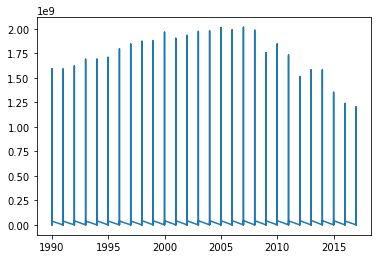

In [9]:
#make a plot for all 
x_axis = Coal["YEAR"]

# x_axis = Coal_2000_js["STATE"]
tick_location = np.arange(len(x_axis))

#e_2000 = Coal_2000_js["STATE"]

e = Coal["GENERATION (Megawatthours)"]
# e_2005 = Coal_2005_js["GENERATION (Megawatthours)"]
# print(x_axis)
# print(Coal_2000_js["STATE"])


plt.plot(x_axis, e)
# plt.plot(x_axis, e_2005)
# plt.subplots_adjust(right = 3)



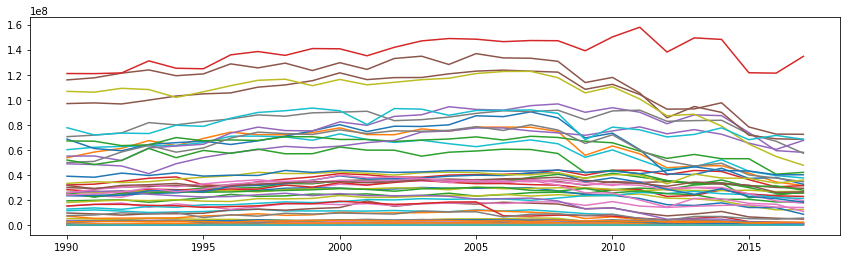

In [10]:
statelist = Coal['STATE'].unique()

statelist
newdf = Coal.loc[Coal['STATE'] != '  '  ]
newdf = newdf.loc[newdf['STATE'] != 'US-Total' ]
newdf = newdf.loc[newdf['STATE'] != 'US-TOTAL' ]



for state in statelist:
    dataset = newdf[newdf["STATE"] == state]
    x_axis = dataset["YEAR"]


    e_2000 = dataset["GENERATION (Megawatthours)"]
    plt.plot(x_axis, e_2000)
    plt.subplots_adjust(right = 2)
# e_2005 = Coal_2005_js["GENERATION (Megawatthours)"]
# print(x_axis)
# print(Coal_2000_js["STATE"])




In [11]:
#group by state find difference 
statelist = Coal['STATE'].unique()

statelist
newdf = Coal.loc[Coal['STATE'] != '  '  ]
newdf = newdf.loc[newdf['STATE'] != 'US-Total' ]
newdf = newdf.loc[newdf['STATE'] != 'US-TOTAL' ]

newdfstatemin = newdf.groupby("STATE").min()
newdfstatemin

newdfstatemax = newdf.groupby("STATE").max()
newdfstatemax



,YEAR,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
STATE,,,,
AK,2017,Total Electric Power Industry,Coal,6.849590e+05
AL,2017,Total Electric Power Industry,Coal,7.812846e+07
AR,2017,Total Electric Power Industry,Coal,3.322075e+07
AZ,2017,Total Electric Power Industry,Coal,4.384026e+07
CA,2017,Total Electric Power Industry,Coal,3.299510e+06
CO,2017,Total Electric Power Industry,Coal,3.626942e+07
CT,2017,Total Electric Power Industry,Coal,4.386608e+06
DC,1995,Total Electric Power Industry,Coal,0.000000e+00
DE,2017,Total Electric Power Industry,Coal,5.621822e+06


In [12]:
#find the differences between the max and min
Coal_different_max = newdfstatemax['GENERATION (Megawatthours)'].tolist()
Coal_different_min = newdfstatemin['GENERATION (Megawatthours)'].tolist()

Coal_diff = [Coal_different_max[x] - Coal_different_min[x] for x in range(len(Coal_different_max))] 
Coal_diff

[256223.0,
 46688056.0,
 15129226.79,
 13436868.0,
 3008418.0,
 7135415.0,
 4209238.0,
 0.0,
 5263025.0,
 35229067.0,
 57810471.0,
 1645211.0,
 16084590.0,
 82844.0,
 45227447.0,
 51260510.0,
 16860492.0,
 34419520.650000006,
 12613870.46,
 11390138.0,
 21425077.0,
 812702.0,
 30283727.0,
 12932755.0,
 37331890.25,
 14567835.0,
 6138128.0,
 45522871.0,
 5069756.0,
 14326926.2,
 3789944.0,
 10409328.0,
 11581978.0,
 17065929.0,
 26509407.0,
 68481962.0,
 19308472.0,
 3127709.0,
 75058823.0,
 0.0,
 23430925.0,
 2179321.0,
 34504226.0,
 37051484.18000001,
 12080924.0,
 29034894.0,
 7326839.0,
 9544508.0,
 25273133.0,
 8355333.640000001]